<a href="https://colab.research.google.com/github/celeneheng/IS170_Binder/blob/5-Principal-Component-Analysis/Principle_Components_Analysis_Iris_HW6_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#iris data comes with the sklearn library
from sklearn.datasets import load_iris

In [ ]:
#load_iris gives both labels and the data. Let's fetch the data.
iris=load_iris()
iris_data=iris.data

In [ ]:
#check the shape of the data
iris_data.shape

(150, 4)

In [ ]:
#rename
iris_labels=iris.target


In [ ]:
#Let's concatenate the data and labels together for a Dataframe (CSV format)
import numpy as np
labels = np.reshape(iris_labels, (150,1))
final_iris_data=np.concatenate([iris_data,labels],axis=1)
final_iris_data.shape

(150, 5)

In [ ]:
#final_iris_data changes to dataframe
import pandas as pd
iris_dataset = pd.DataFrame(final_iris_data)

In [ ]:
#let's check the features
features=iris.feature_names
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
#label is missing, so add it here
features_labels=np.append(features,'label')
#add the column names to the dataframe
iris_dataset.columns=features_labels
iris_dataset.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
iris_dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


### Data Normalization & Visualization

In [ ]:
#Before we do the data visualization, we'll normalize the data.
#The data normalization is a common practice 
#StandardScaler is the normalizing function.
#After the normalization, we'll do fit_transform on the data.
from sklearn.preprocessing import StandardScaler
x=iris_dataset.loc[:,features].values
x=StandardScaler().fit_transform(x) 


In [ ]:
x.shape

(150, 4)

In [ ]:
#normalized data has a mean of zero and a standard deviation of one
np.mean(x), np.std(x)

(-1.4684549872375404e-15, 1.0)

In [ ]:
#converting the normalized features into a dataframe form
feat_cols=['feature'+str(i) for i in range(x.shape[1])]
normalized_iris=pd.DataFrame(x,columns=feat_cols)
normalized_iris.head()

,feature0,feature1,feature2,feature3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
#For the PCA, we'll try components 2
from sklearn.decomposition import PCA
pca_iris=PCA(n_components=2)
principalComponents_iris=pca_iris.fit_transform(x)


In [ ]:
principal_iris_DF=pd.DataFrame(data=principalComponents_iris, columns=['principal component1', 'principal component2'])

In [ ]:
principal_iris_DF.head()

,principal component1,principal component2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


Once you have the principal components, you can find the explained_variance_ratio. It will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

In [ ]:
print('Explained variation per principal component: {}'.format(pca_iris.explained_variance_ratio_))

Explained variation per principal component: [0.72962445 0.22850762]


The results above tells us that the principal component 1 holds 72.9% of the information and the principal component 2 holds 22.8%. 

<Figure size 432x288 with 0 Axes>

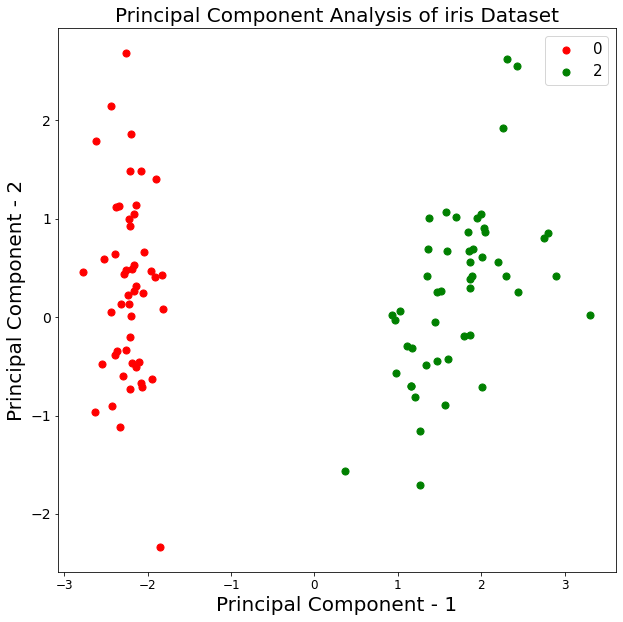

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of iris Dataset",fontsize=20)
targets = [0,2]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = iris_dataset['label'] == target
    plt.scatter(principal_iris_DF.loc[indicesToKeep, 'principal component1']
               , principal_iris_DF.loc[indicesToKeep, 'principal component2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

Component 1 and compnent 2 are different species of Iris. Based on the data gathered there is predicatable difference between these two species of Iris. 